In [1]:
# Importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
from apyori import apriori
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading in our dataset

bakery_data = pd.read_csv("Bakery.csv")
bakery_data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


## Exploring our dataset

In [3]:
# Checking for the first 5 rows in dataset

bakery_data.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [4]:
# Checking for the first 10 rows for more insight

bakery_data.head(10)

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
5,3,Cookies,2016-10-30 10:07:57,Morning,Weekend
6,4,Muffin,2016-10-30 10:08:41,Morning,Weekend
7,5,Coffee,2016-10-30 10:13:03,Morning,Weekend
8,5,Pastry,2016-10-30 10:13:03,Morning,Weekend
9,5,Bread,2016-10-30 10:13:03,Morning,Weekend


In [5]:
# Checking for the number of rows and columns in our dataset

bakery_data.shape

(20507, 5)

In [6]:
# Checking the structure of dataset using describe

bakery_data.describe()

,TransactionNo
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [7]:
# Checking for more information 

bakery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
# Checking for the last five rows 

bakery_data.tail()

,TransactionNo,Items,DateTime,Daypart,DayType
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend
20506,9684,Smoothies,2017-09-04 15:04:24,Afternoon,Weekend


In [9]:
# Checking to see if there are null values in dataset

bakery_data.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [10]:
# Checking the columnns

bakery_data.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'], dtype='object')

In [11]:
# Since there are no null values in the dataset, we check to see if there are "NONE" values

bakery_data.loc[bakery_data['Items']=='NONE',:].count()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [12]:
# Checking to see the number of items being sold by the bakery

bakery_data['Items'].nunique()

94

In [13]:
# Now we sort those items based on the ones the bakery sold the most (best selling items)

bakery_data['Items'].value_counts().sort_values(ascending=False).head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Items, dtype: int64

Text(0.5, 1.0, 'Most Sold Items')

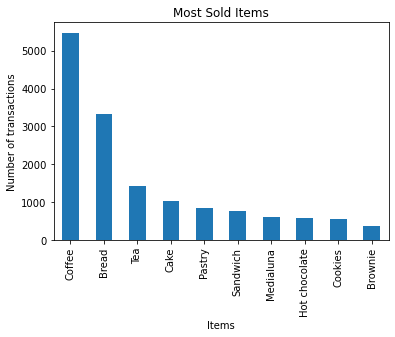

In [14]:
# We show/visualise the result using a bar graph

fig, ax=plt.subplots(figsize=(6,4))
bakery_data['Items'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of transactions')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Most Sold Items')

In [15]:
bakery_data.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [16]:
bakery_data.tail(10)

,TransactionNo,Items,DateTime,Daypart,DayType
20497,9681,Tea,2017-09-04 14:30:09,Afternoon,Weekend
20498,9681,Spanish Brunch,2017-09-04 14:30:09,Afternoon,Weekend
20499,9681,Christmas common,2017-09-04 14:30:09,Afternoon,Weekend
20500,9682,Muffin,2017-09-04 14:32:58,Afternoon,Weekend
20501,9682,Tacos/Fajita,2017-09-04 14:32:58,Afternoon,Weekend
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend
20506,9684,Smoothies,2017-09-04 15:04:24,Afternoon,Weekend


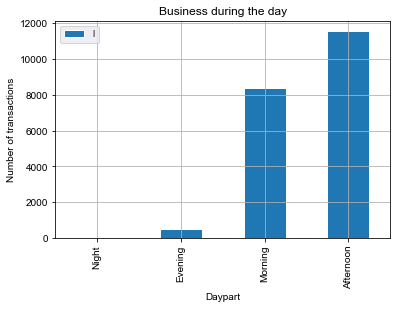

In [17]:
# Based on our dataset, we get to explore the busiest time of day in the bakery

bakery_data.loc[(bakery_data['DateTime']<'12:00:00'),'Daypart']='Morning'
bakery_data.loc[(bakery_data['DateTime']>='12:00:00')&(bakery_data['DateTime']<'12:00:00'),'Daypart']='Afternoon'
bakery_data.loc[(bakery_data['DateTime']>='17:00:00')&(bakery_data['DateTime']<'17:00:00'),'Daypart']='Evening'
bakery_data.loc[(bakery_data['DateTime']>='21:00:00')&(bakery_data['DateTime']<'23:50:00'),'Daypart']='Night'
#bakery_data.loc[(bakery_data['DayType'])


fig, ax=plt.subplots(figsize=(6,4))
sns.set_style('darkgrid')
bakery_data.groupby('Daypart',)['Items'].count().sort_values().plot(kind='bar')
plt.ylabel('Number of transactions')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Business during the day')
plt.legend('labels')
plt.show()

<AxesSubplot:>

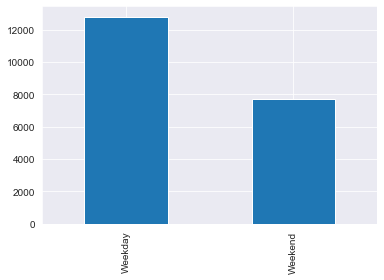

In [18]:
# Checking to see how busy it gets in the bakery on weekends vs weekdays

bakery_data['DayType'].value_counts().plot.bar()

In [19]:
bakery_data.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [20]:
# Giving more insight to what was displayed in the graph above

bakery_data.groupby('Daypart')['Items'].count().sort_values(ascending=False)

Daypart
Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: Items, dtype: int64

In [21]:
bakery_data.groupby('DayType')['Items'].count().sort_values(ascending=False)

DayType
Weekday    12807
Weekend     7700
Name: Items, dtype: int64

In [22]:
# Now we extract the exact months and days from our dataset for more insight

bakery_data['DateTime']=pd.to_datetime(bakery_data['DateTime'])
bakery_data['Day']=bakery_data['DateTime'].dt.day_name()
bakery_data['Month']=bakery_data['DateTime'].dt.month
bakery_data['Month_name']=bakery_data['DateTime'].dt.month_name()
bakery_data['Year']=bakery_data['DateTime'].dt.year
bakery_data['Year_Month']=bakery_data['Year'].apply(str)+' '+bakery_data['Month_name'].apply(str)
#bakery_data.drop(['DateTime'], axis=1, inplace=True)

bakery_data.index=bakery_data['DateTime']
bakery_data.index.name='DateTime'
bakery_data.drop(['DateTime'],axis=1,inplace=True)
#bakery_data.head()
bakery_data.head()

,TransactionNo,Items,Daypart,DayType,Day,Month,Month_name,Year,Year_Month
DateTime,,,,,,,,,
2016-10-30 09:58:11,1,Bread,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Hot chocolate,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Jam,Morning,Weekend,Sunday,10,October,2016,2016 October


In [23]:
bakery_data.head(10)

,TransactionNo,Items,Daypart,DayType,Day,Month,Month_name,Year,Year_Month
DateTime,,,,,,,,,
2016-10-30 09:58:11,1,Bread,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Hot chocolate,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Jam,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Cookies,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:08:41,4,Muffin,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:13:03,5,Coffee,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:13:03,5,Pastry,Morning,Weekend,Sunday,10,October,2016,2016 October


In [24]:
bakery_data.tail(10)

,TransactionNo,Items,Daypart,DayType,Day,Month,Month_name,Year,Year_Month
DateTime,,,,,,,,,
2017-09-04 14:30:09,9681,Tea,Afternoon,Weekend,Monday,9,September,2017,2017 September
2017-09-04 14:30:09,9681,Spanish Brunch,Afternoon,Weekend,Monday,9,September,2017,2017 September
2017-09-04 14:30:09,9681,Christmas common,Afternoon,Weekend,Monday,9,September,2017,2017 September
2017-09-04 14:32:58,9682,Muffin,Afternoon,Weekend,Monday,9,September,2017,2017 September
2017-09-04 14:32:58,9682,Tacos/Fajita,Afternoon,Weekend,Monday,9,September,2017,2017 September
2017-09-04 14:32:58,9682,Coffee,Afternoon,Weekend,Monday,9,September,2017,2017 September
2017-09-04 14:32:58,9682,Tea,Afternoon,Weekend,Monday,9,September,2017,2017 September
2017-09-04 14:57:06,9683,Coffee,Afternoon,Weekend,Monday,9,September,2017,2017 September
2017-09-04 14:57:06,9683,Pastry,Afternoon,Weekend,Monday,9,September,2017,2017 September


Text(0.5, 1.0, 'Business over the year')

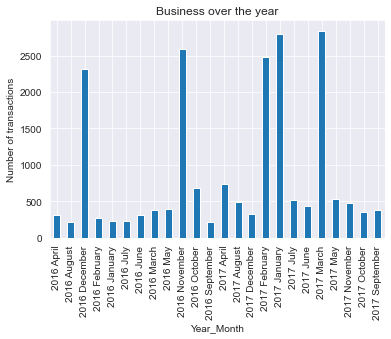

In [25]:
# Now using bar graph to show more insight of our newly extracted data
# Also plotting to see the bakery's business growth in the past year

bakery_data.groupby('Year_Month')['Items'].count().plot(kind='bar')
plt.ylabel('Number of transactions')
plt.title('Business over the year')

In [26]:
# Now checking for the most sold items in a given month

new_bakery_data =bakery_data.pivot_table(index='Month_name',columns='Items', aggfunc={'Items':'count'}).fillna(0)
new_bakery_data['Max']=new_bakery_data.idxmax(axis=1)
new_bakery_data.head()

Items                                                     \
Items      Adjustment Afternoon with the baker Alfajores Argentina Night   
Month_name                                                                 
April             0.0                      0.0      15.0             0.0   
August            0.0                      3.0      19.0             4.0   
December          0.0                      2.0      33.0             0.0   
February          0.0                      8.0      83.0             1.0   
January           0.0                     10.0      50.0             0.0   

                                                                 ...  \
Items      Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ...   
Month_name                                                       ...   
April           1.0   0.0      9.0      0.0          0.0    0.0  ...   
August          3.0   0.0      7.0      0.0          0.0    0.0  ...   
December        4.0   0.0      5.0      5.0          3.0    0.0  ...   
February        3.0   0.0     35.0      0.0          2.0    0.0  ...   
January         4.0   0.0     28.0     11.0          0.0    0.0  ...   

                                                                    \
Items      The Nomad Tiffin Toast Truffles Tshirt Valentine's card   
Month_name                                                           
April            2.0    4.0  13.0     14.0   21.0              5.0   
August           8.0    7.0   4.0     11.0    0.0              0.0   
December         8.0    3.0  52.0     24.0    0.0              0.0   
February         7.0   28.0  44.0     19.0    0.0              3.0   
January         14.0   28.0  58.0     28.0    0.0              1.0   

                                                                    Max  
Items      Vegan Feast Vegan mincepie Victorian Sponge                   
Month_name                                                               
April              2.0            0.0              0.0  (Items, Coffee)  
August             7.0            3.0              0.0  (Items, Coffee)  
December           1.0           31.0              0.0  (Items, Coffee)  
February           2.0            4.0              0.0  (Items, Coffee)  
January            0.0            7.0              1.0  (Items, Coffee)  

[5 rows x 95 columns]

In [27]:
# Checking for the most sold items during the time of day

bakery_data_3=bakery_data.pivot_table(index='Daypart',columns='Items', aggfunc={'Items':'count'}).fillna(0)
bakery_data_3['Max']=bakery_data_3.idxmax(axis=1)
bakery_data_3.head()

Items                                                     \
Items     Adjustment Afternoon with the baker Alfajores Argentina Night   
Daypart                                                                   
Afternoon        0.0                     19.0     245.0             3.0   
Evening          1.0                     15.0      17.0             0.0   
Morning          0.0                     10.0     107.0             4.0   
Night            0.0                      0.0       0.0             0.0   

                                                                ...            \
Items     Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ... The Nomad   
Daypart                                                         ...             
Afternoon     31.0   1.0     67.0     30.0          4.0    0.0  ...      31.0   
Evening        2.0   0.0      1.0      0.0          1.0    0.0  ...       1.0   
Morning        5.0   0.0     84.0     18.0          0.0    6.0  ...      26.0   
Night          0.0   0.0      0.0      0.0          0.0    0.0  ...       0.0   

                                                                      \
Items     Tiffin  Toast Truffles Tshirt Valentine's card Vegan Feast   
Daypart                                                                
Afternoon   93.0  114.0    152.0    0.0              4.0         4.0   
Evening      4.0    0.0      7.0   21.0              4.0         3.0   
Morning     49.0  204.0     34.0    0.0              3.0         2.0   
Night        0.0    0.0      0.0    0.0              2.0         7.0   

                                                            Max  
Items     Vegan mincepie Victorian Sponge                        
Daypart                                                          
Afternoon           30.0              5.0       (Items, Coffee)  
Evening              2.0              0.0       (Items, Coffee)  
Morning             22.0              2.0       (Items, Coffee)  
Night                0.0              0.0  (Items, Vegan Feast)  

[4 rows x 95 columns]

In [28]:
# Checking for most sold items during the week

bakery_data_4 = bakery_data.pivot_table(index='Day',columns='Items', aggfunc={'Items':'count'}).fillna(0)
bakery_data_4['Max']=bakery_data_4.idxmax(axis=1)
bakery_data_4.head()

Items                                                     \
Items    Adjustment Afternoon with the baker Alfajores Argentina Night   
Day                                                                      
Friday          0.0                      6.0      58.0             5.0   
Monday          0.0                      5.0      44.0             0.0   
Saturday        0.0                     12.0      60.0             1.0   
Sunday          1.0                      5.0      69.0             0.0   
Thursday        0.0                      5.0      61.0             1.0   

                                                               ...            \
Items    Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ... The Nomad   
Day                                                            ...             
Friday        4.0   0.0     24.0      3.0          0.0    0.0  ...      10.0   
Monday        3.0   0.0     21.0      9.0          0.0    0.0  ...       7.0   
Saturday      1.0   0.0     19.0     11.0          0.0    1.0  ...      11.0   
Sunday        8.0   1.0     23.0      8.0          0.0    2.0  ...      11.0   
Thursday      8.0   0.0     25.0      3.0          4.0    0.0  ...       5.0   

                                                                    \
Items    Tiffin Toast Truffles Tshirt Valentine's card Vegan Feast   
Day                                                                  
Friday     32.0  58.0     32.0    0.0              0.0         8.0   
Monday      9.0  42.0     35.0    0.0              1.0         1.0   
Saturday   29.0  52.0     21.0    0.0              3.0         0.0   
Sunday     25.0  35.0     32.0   21.0              5.0         3.0   
Thursday   21.0  52.0     20.0    0.0              2.0         0.0   

                                                      Max  
Items    Vegan mincepie Victorian Sponge                   
Day                                                        
Friday             10.0              0.0  (Items, Coffee)  
Monday              7.0              1.0  (Items, Coffee)  
Saturday           10.0              1.0  (Items, Coffee)  
Sunday              6.0              3.0  (Items, Coffee)  
Thursday            4.0              0.0  (Items, Coffee)  

[5 rows x 95 columns]

Text(0.5, 1.0, 'Business in the past months')

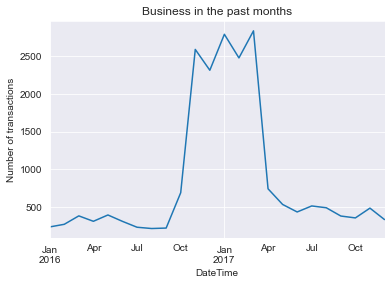

In [29]:
# Finally, we check for the business growth of the bakery in the past months

bakery_data['Items'].resample('M').count().plot()
plt.ylabel('Number of transactions')
plt.title('Business in the past months')

## Applying Apriori Algorithm & Association Rule to Dataset

In [30]:
bakery_data.head()

,TransactionNo,Items,Daypart,DayType,Day,Month,Month_name,Year,Year_Month
DateTime,,,,,,,,,
2016-10-30 09:58:11,1,Bread,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Hot chocolate,Morning,Weekend,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Jam,Morning,Weekend,Sunday,10,October,2016,2016 October


In [31]:
#transactions = utils.data_prepare(bakery_data)
#transactions

In [32]:
#Rules = list(apriori(transactions, min_support=0.02, min_confidence=0.2))
#associationRules = utils.extract(Rules)
#rules_d = pd.DataFrame(associationRules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
#len(rules_d)

In [33]:
# creating a dataset that contains items that are often bought together

new_data = []
for item in bakery_data['TransactionNo'].unique():
    new_data_n = list(set(bakery_data[bakery_data['TransactionNo'] == item]['Items']))
    if len(new_data_n)>0:
        new_data.append(new_data_n)
print(new_data[0:3])
print(len(new_data))

[['Bread'], ['Scandinavian'], ['Hot chocolate', 'Cookies', 'Jam']]
9465


In [34]:
# Now for the Apriori algorithm, the dataset has to be onehot-encoded using the 'TranstionEncoder' function

te = TransactionEncoder()
te_bakery = te.fit(new_data).transform(new_data)
bakery = pd.DataFrame(te_bakery,columns=te.columns_)
bakery.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# Setting up frequently bought together items

frequent_items= apriori(bakery, use_colnames=True, min_support=0.03)
print(frequent_items.head())

    support     itemsets
0  0.036344  (Alfajores)
1  0.327205      (Bread)
2  0.040042    (Brownie)
3  0.103856       (Cake)
4  0.478394     (Coffee)


In [44]:
# Then apply association rule function using the "lift" function to check the items often bought together

#associationRules = utils.extract(frequent_items)

rules_df = association_rules(frequent_items, metric="lift", min_threshold=1)
rules_df.antecedents = rules_df.antecedents.apply(lambda x: next(iter(x)))
rules_df.consequents = rules_df.consequents.apply(lambda x: next(iter(x)))
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
2,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
3,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
4,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
5,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
6,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807
7,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384


In [45]:
# Checking for the number of assocation rules in our data 

len(rules_df)

8

In [46]:
# Applying association rule function using the "confidence" function to check the items often bought together

rules_df_c = association_rules(frequent_items, metric="confidence", min_threshold=0.5)
rules_df_c.antecedents = rules_df_c.antecedents.apply(lambda x: next(iter(x)))
rules_df_c.consequents = rules_df_c.consequents.apply(lambda x: next(iter(x)))
rules_df_c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
2,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
3,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384


In [47]:
# Checking for the number of assocation rules in our data 

len(rules_df_c)

4

In [48]:
# Then apply association rule function using the "confidence" function to check the items often bought together

rules_df_s = association_rules(frequent_items, metric="support", min_threshold=0.05)
rules_df_s.antecedents = rules_df_s.antecedents.apply(lambda x: next(iter(x)))
rules_df_s.consequents = rules_df_s.consequents.apply(lambda x: next(iter(x)))
rules_df_s

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Bread,Coffee,0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561
1,Coffee,Bread,0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731
2,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
3,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905


In [41]:
#!pip install plotly==5.10.0

In [50]:
# Using plotly express to create interactive plot of the rule

import plotly.express as px

bakery_df = pd.DataFrame(rules_df, columns= ['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction'])
fig = px.scatter(bakery_df, x='support', y='confidence', color='lift',
                hover_data=['antecedents', 'consequents'], color_continuous_scale='agsunset')

fig.show()

In [51]:
# Using pandas DataFrame to sort for the popularity of Coffee in the data

Coffee_pop = rules_df[rules_df['consequents'].apply(lambda x: 'Coffee' in x)].sort_values(by=['lift'], 
                                                                                          ascending=False)
Coffee_pop.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
5,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
7,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
0,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664


In [52]:
# Using the plotly express scatterplot to once again explore the rule

fig = px.scatter(Coffee_pop, x='support', y='confidence', color='lift',
                hover_data=['antecedents', 'consequents'], color_continuous_scale='viridis')

fig.show()

In [53]:
# Using plotly express to create interactive plot of the rule

import plotly.express as px

bakery_df_c = pd.DataFrame(rules_df_c, columns= ['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction'])
fig = px.scatter(bakery_df_c, x='support', y='confidence', color='lift',
                hover_data=['antecedents', 'consequents'], color_continuous_scale='icefire')

fig.show()

In [54]:
# Using plotly express to create interactive plot of the rule

import plotly.express as px

bakery_df_s = pd.DataFrame(rules_df_s, columns= ['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction'])
fig = px.scatter(bakery_df_s, x='support', y='confidence', color='lift',
                hover_data=['antecedents', 'consequents'], color_continuous_scale='spectral')

fig.show()